<a href="https://colab.research.google.com/github/Mahdi-Golizadeh/my_tf_xp/blob/main/tf_custom_model_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
class Vgg_Block(tf.keras.Model):
    def __init__(self, n_filters, kernel_size, num_layers, pool_size= 2, strides= 2):
        super(Vgg_Block, self).__init__()
        self.f = n_filters
        self.k = kernel_size
        self.r = num_layers

        for l in range(num_layers):
            vars(self)[f"conv_{l}"] = tf.keras.layers.Conv2D(n_filters, 
                                                             kernel_size, 
                                                             padding= "same", 
                                                             activation= tf.keras.activations.relu)
            
        self.mx_pool = tf.keras.layers.MaxPool2D(pool_size, strides)
    def call(self, inputs):
        out = self.conv_0(inputs)
        for i in range(1, self.r):
            conv_i = vars(self)[f"conv_{i}"]
            out = conv_i(out)
        return self.mx_pool(out)

In [3]:
class My_VGG(tf.keras.Model):

    def __init__(self, num_classes):
        super(My_VGG, self).__init__()

        self.block_a = Vgg_Block(64, 3, 2)
        self.block_b = Vgg_Block(128, 3, 2)
        self.block_c = Vgg_Block(256, 3, 3)
        self.block_d = Vgg_Block(512, 3, 3)
        self.block_e = Vgg_Block(512, 3, 3)

        self.flatten = tf.keras.layers.Flatten()
        self.fc = tf.keras.layers.Dense(256, activation= "relu")
        self.classifier = tf.keras.layers.Dense(num_classes, activation= "softmax")

    def call(self, inputs):
        x = self.block_a(inputs)
        x = self.block_b(x)
        x = self.block_c(x)
        x = self.block_d(x)
        x = self.block_e(x)
        x = self.flatten(x)
        x = self.fc(x)
        return self.classifier(x)

In [4]:
dataset = tfds.load('tf_flowers', split=tfds.Split.TRAIN, data_dir='data/')

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to data/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [17]:
sample = dataset.take(1)

In [11]:
sample = list(sample)

In [22]:
sample= list(sample.as_numpy_iterator())

In [29]:
image = sample[0][0][0]
image.shape

(224, 224, 3)

Text(0.5, 1.0, '2')

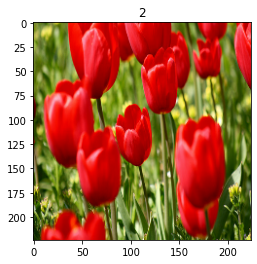

In [31]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(sample[0][1][0])

In [5]:
# Initialize VGG with the number of classes 
vgg = My_VGG(num_classes=5)

# Compile with losses and metrics
vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define preprocessing function
def preprocess(features):
    # Resize and normalize
    image = tf.image.resize(features['image'], (224, 224))
    return tf.cast(image, tf.float32) / 255., features['label']

# Apply transformations to dataset
dataset = dataset.map(preprocess).batch(32)

# Train the custom VGG model
vgg.fit(dataset, epochs=10)

Epoch 1/10
115/115 [==============================] - 28s 133ms/step - loss: 1.5818 - accuracy: 0.2793
Epoch 2/10
115/115 [==============================] - 13s 112ms/step - loss: 1.5211 - accuracy: 0.3458
Epoch 3/10
115/115 [==============================] - 13s 112ms/step - loss: 1.4695 - accuracy: 0.3866
Epoch 4/10
115/115 [==============================] - 13s 113ms/step - loss: 1.4218 - accuracy: 0.4172
Epoch 5/10
115/115 [==============================] - 13s 114ms/step - loss: 1.3718 - accuracy: 0.4452
Epoch 6/10
115/115 [==============================] - 13s 115ms/step - loss: 1.3230 - accuracy: 0.4559
Epoch 7/10
115/115 [==============================] - 13s 115ms/step - loss: 1.2784 - accuracy: 0.4741
Epoch 8/10
115/115 [==============================] - 13s 115ms/step - loss: 1.2387 - accuracy: 0.4948
Epoch 9/10
115/115 [==============================] - 13s 115ms/step - loss: 1.2036 - accuracy: 0.5150
Epoch 10/10
115/115 [==============================] - 13s 116ms/step - l

In [6]:
vgg.summary()

Model: "my_vgg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg__block (Vgg_Block)      multiple                  0         
                                                                 
 vgg__block_1 (Vgg_Block)    multiple                  0         
                                                                 
 vgg__block_2 (Vgg_Block)    multiple                  0         
                                                                 
 vgg__block_3 (Vgg_Block)    multiple                  0         
                                                                 
 vgg__block_4 (Vgg_Block)    multiple                  0         
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  64227